In [157]:
data.tail()

,uc,rera,bhk,brk,sqft,rom,resale,lo,la,price
29446,0,0,0,0,2500.000000,1,1,27.140626,78.043277,45.0
29447,0,0,0,0,769.230769,1,1,39.945409,-86.150721,16.0
29448,0,0,0,0,1022.641509,1,1,26.928785,75.828002,27.1
29449,0,0,0,0,927.079009,1,1,12.900150,80.227910,67.0
29450,0,1,0,0,896.774194,1,1,26.832353,75.841749,27.8


In [173]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, accuracy_score

In [177]:
data = pd.read_csv("train.csv")
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [178]:
data = data.drop(['POSTED_BY','ADDRESS'],axis=1)
data.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0
1,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0
2,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0
3,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5
4,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5


In [197]:
data['bhk'].unique()

array([ 2,  3,  1,  4,  5,  6, 12,  8, 20, 10,  7,  9, 13, 17, 15, 11])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='bhk', ylabel='sqft'>

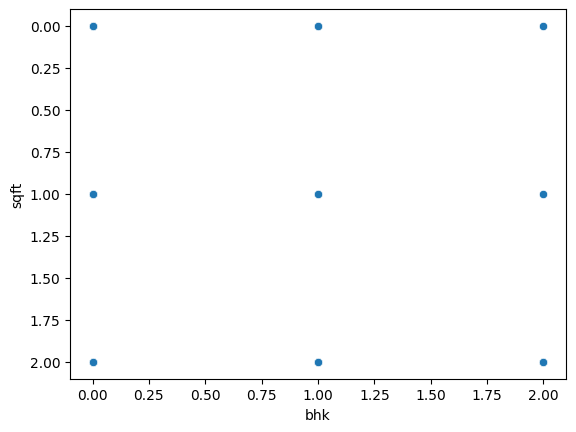

In [164]:
sns.scatterplot(data=data,x='bhk',y='sqft')


In [ ]:
sns.scatterplot(data=data,x='bhk',y='price')

In [179]:
data = data.rename(columns={'TARGET(PRICE_IN_LACS)':'price'})
data = data.rename(columns={'UNDER_CONSTRUCTION':'uc'})
data = data.rename(columns={'RERA':'rera'})
data = data.rename(columns={'BHK_NO.':'bhk'})
data = data.rename(columns={'BHK_OR_RK':'brk'})
data = data.rename(columns={'SQUARE_FT':'sqft'})
data = data.rename(columns={'READY_TO_MOVE':'rom'})
data = data.rename(columns={'RESALE':'resale'})
data = data.rename(columns={'LONGITUDE':'lo'})
data = data.rename(columns={'LATITUDE':'la'})

In [183]:
le = LabelEncoder()
data['brk'] = le.fit_transform(data.brk.values)

In [184]:
data.head(11)

,uc,rera,bhk,brk,sqft,rom,resale,lo,la,price
0,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55.0
1,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51.0
2,0,0,2,0,933.159722,1,1,12.778033,77.632191,43.0
3,0,1,2,0,929.921143,1,1,28.642300,77.344500,62.5
4,1,0,2,0,999.009247,0,1,22.592200,88.484911,60.5
5,0,0,3,0,1250.000000,1,1,10.033280,76.282571,42.0
6,0,0,3,0,1495.053957,1,1,26.916347,75.795600,66.5
7,0,1,3,0,1181.012946,1,1,30.740000,76.650000,52.0
8,0,1,2,0,1040.000000,1,1,13.054202,77.674002,41.6
9,0,1,2,0,879.120879,1,1,12.951610,80.140970,36.0


In [185]:
correlation_matrix = data.corr()
print(correlation_matrix)

              uc      rera       bhk       brk      sqft       rom    resale  \
uc      1.000000  0.363826 -0.040712  0.020719 -0.004204 -1.000000 -0.347405   
rera    0.363826  1.000000  0.009547  0.006056 -0.006229 -0.363826 -0.270351   
bhk    -0.040712  0.009547  1.000000 -0.045231  0.005303  0.040712  0.014581   
brk     0.020719  0.006056 -0.045231  1.000000 -0.000292 -0.020719 -0.029346   
sqft   -0.004204 -0.006229  0.005303 -0.000292  1.000000  0.004204  0.001732   
rom    -1.000000 -0.363826  0.040712 -0.020719  0.004204  1.000000  0.347405   
resale -0.347405 -0.270351  0.014581 -0.029346  0.001732  0.347405  1.000000   
lo      0.006440  0.104976  0.068730  0.009095 -0.012591 -0.006440  0.024038   
la     -0.000381 -0.065106  0.046930  0.000303  0.000803  0.000381  0.014844   
price   0.055399  0.067636  0.112283 -0.004429  0.402685 -0.055399 -0.207378   

              lo        la     price  
uc      0.006440 -0.000381  0.055399  
rera    0.104976 -0.065106  0.067636  
bh

In [186]:
predict = "price"
data1 = data[['uc','rera','bhk','brk','sqft','rom','resale','lo','la','price']]


In [187]:
x = np.array(data1.drop([predict],axis=1))
y = np.array(data1[predict])

In [188]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [189]:
lrmodel = LinearRegression().fit(x_train, y_train)
dt_model = DecisionTreeRegressor().fit(x_train,y_train)
rf_model = RandomForestRegressor().fit(x_train,y_train)
gbm_model = GradientBoostingRegressor().fit(x_train,y_train)
lgbm_model = LGBMRegressor().fit(x_train,y_train)
xgb_model = XGBRegressor().fit(x_train,y_train)
catb_model = CatBoostRegressor().fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 23560, number of used features: 8
[LightGBM] [Info] Start training from score 138.089745
Learning rate set to 0.06745
0:	learn: 596.4459535	total: 3.01ms	remaining: 3s
1:	learn: 570.5528107	total: 7.58ms	remaining: 3.78s
2:	learn: 547.2920717	total: 9.98ms	remaining: 3.31s
3:	learn: 523.3892462	total: 12.2ms	remaining: 3.03s
4:	learn: 503.0714009	total: 16.2ms	remaining: 3.22s
5:	learn: 480.9867032	total: 19.2ms	remaining: 3.17s
6:	learn: 460.2869266	total: 21.8ms	remaining: 3.09s
7:	learn: 441.8844564	total: 24.1ms	remaining: 2.99s
8:	learn: 425.4645200	total: 26.4ms	remaining: 2.9s
9:	learn: 408.2315865	total: 29.2ms	remaining: 2.89s
10:	learn: 391.9397257	total: 31.4ms	re

In [190]:
def evaluate_model(model,x_test,y_test):
    prediction = model.predict(x_test)
    print("Mean Absolute error", mean_absolute_error(y_test,prediction))
    print("Mean Absolute Percentage error", mean_absolute_percentage_error(y_test,prediction))
    print("Mean Squared error", mean_squared_error(y_test,prediction))
    print("Root Mean Squared error", np.sqrt(mean_squared_error(y_test,prediction)))
    print("R2 Score", r2_score(y_test,prediction))

In [191]:
print("LR_Model:")
print(evaluate_model(lrmodel,x_test,y_test))
print()
print("DT_Model:")
print(evaluate_model(dt_model,x_test,y_test))
print()
print("RF_Model:")
print(evaluate_model(rf_model,x_test,y_test))
print()
print("GBM_Model:")
print(evaluate_model(gbm_model,x_test,y_test))
print()
print("LGBM_Model:")
print(evaluate_model(lgbm_model,x_test,y_test))
print()
print("XGB_Model:")
print(evaluate_model(xgb_model,x_test,y_test))
print()
print("CatBoost_Model:")
print(evaluate_model(catb_model,x_test,y_test))

LR_Model:
Mean Absolute error 151.94344120596472
Mean Absolute Percentage error 1.7139792249495864
Mean Squared error 490442.2692937708
Root Mean Squared error 700.3158353869851
R2 Score 0.18591648810731864
None

DT_Model:
Mean Absolute error 41.90300721035316
Mean Absolute Percentage error 0.3723628201323836
Mean Squared error 42167.7784217528
Root Mean Squared error 205.3479447711927
R2 Score 0.9300058431021354
None

RF_Model:
Mean Absolute error 35.559849411978746
Mean Absolute Percentage error 0.31032671010701457
Mean Squared error 26624.55938792313
Root Mean Squared error 163.17033856655178
R2 Score 0.9558059813230886
None

GBM_Model:
Mean Absolute error 43.75808667948491
Mean Absolute Percentage error 0.4765597282839665
Mean Squared error 22588.25813718711
Root Mean Squared error 150.2939058551181
R2 Score 0.962505824511539
None

LGBM_Model:
Mean Absolute error 46.96036743057978
Mean Absolute Percentage error 0.41299740920936334
Mean Squared error 101661.8055120733
Root Mean Squa

In [205]:
input=[[1,0,2,0,999.009247,0,1,22.592200,88.484911]]
price = dt_model.predict(input)
print(price)

[60.5]


In [192]:
data.head(11)
0,0,22,0,933.159722,1,1,12.778033,77.632191
1,0,2,0,999.009247,0,1,22.592200,88.484911

,uc,rera,bhk,brk,sqft,rom,resale,lo,la,price
0,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55.0
1,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51.0
2,0,0,2,0,933.159722,1,1,12.778033,77.632191,43.0
3,0,1,2,0,929.921143,1,1,28.642300,77.344500,62.5
4,1,0,2,0,999.009247,0,1,22.592200,88.484911,60.5
5,0,0,3,0,1250.000000,1,1,10.033280,76.282571,42.0
6,0,0,3,0,1495.053957,1,1,26.916347,75.795600,66.5
7,0,1,3,0,1181.012946,1,1,30.740000,76.650000,52.0
8,0,1,2,0,1040.000000,1,1,13.054202,77.674002,41.6
9,0,1,2,0,879.120879,1,1,12.951610,80.140970,36.0


In [206]:
import pickle
pickle.dump(dt_model,open("house_price_predictor_dt.pkl","wb"))


In [ ]:
import pickle
pickle.dump(catb_model,open("house_price_predictor.pkl","wb"))